# Amsterdam House Price Prediction

##  1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu


In [1]:
import pandas as pd

# Đọc dữ liệu từ file CSV
houseprices_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

# Giữ lại các cột cần thiết
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]

# Tạo biến mới: Giá trung bình mỗi mét vuông
houseprices_data['PriceperSqm'] = houseprices_data['Price'] / houseprices_data['Area']

# Xem 5 dòng đầu tiên để kiểm tra
print(houseprices_data.head())


       Zip     Price  Area  Room   PriceperSqm
0  1091 CR  685000.0    64     3  10703.125000
1  1059 EL  475000.0    60     3   7916.666667
2  1097 SM  850000.0   109     4   7798.165138
3  1060 TH  580000.0   128     6   4531.250000
4  1036 KN  720000.0   138     5   5217.391304


## 2. Trực quan hóa dữ liệu với thư viện Matplotlib

### Case 1: Basic

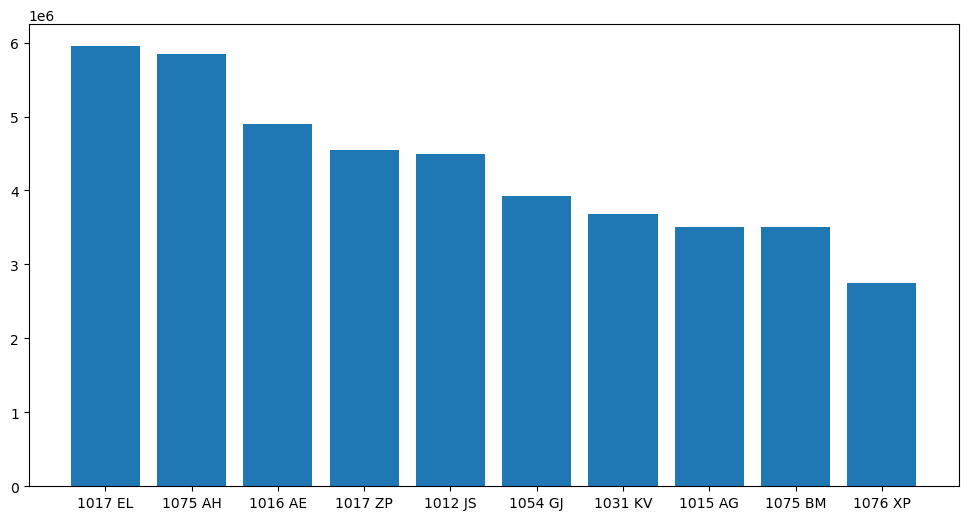

In [2]:
import matplotlib.pyplot as plt

# Sắp xếp dữ liệu theo giá nhà giảm dần
houseprices_sorted = houseprices_data.sort_values('Price', ascending=False)

# --- Case 1: Basic ---
plt.figure(figsize=(12, 6))
x = houseprices_sorted['Zip'].head(10)
y = houseprices_sorted['Price'].head(10)
plt.bar(x, y)
plt.show()


##### Mục tiêu: Vẽ biểu đồ cột đơn giản cho Top 10 khu vực có giá nhà cao nhất.
##### plt.bar(x, y) → tạo biểu đồ cột với trục X là mã vùng (Zip), trục Y là giá nhà (Price).
##### → Dạng cơ bản, chưa có nhãn hoặc tiêu đề.

### Case 2: advanced 1

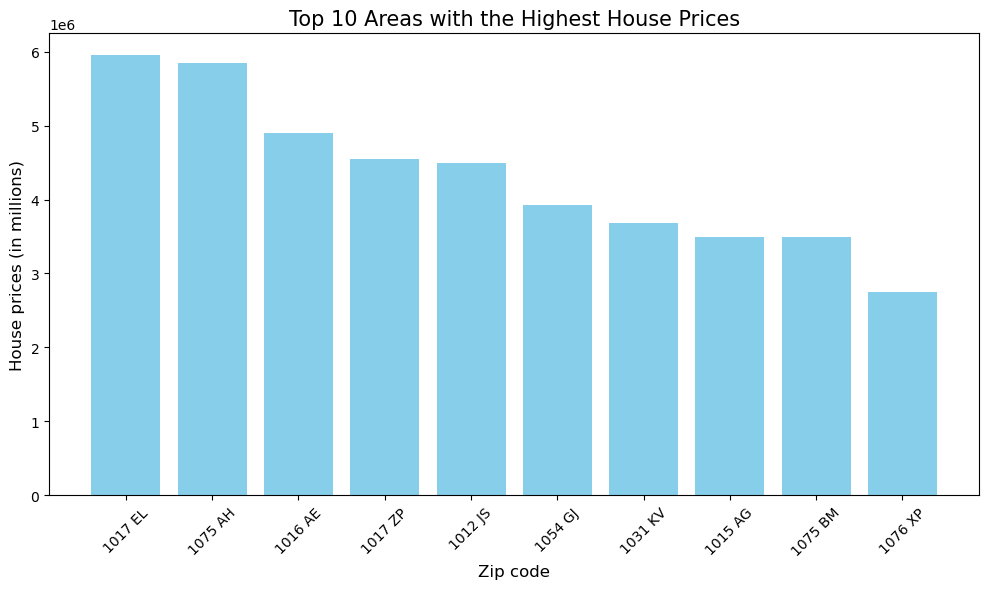

In [3]:
# --- Case 2: Advanced 1 ---
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')
plt.title('Top 10 Areas with the Highest House Prices', fontsize=15)
plt.xlabel('Zip code', fontsize=12)
plt.ylabel('House prices (in millions)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

##### Thêm tiêu đề, nhãn trục, kích thước chữ, màu sắc.
##### Dễ đọc hơn, biểu đồ có ngữ cảnh và chuyên nghiệp hơn.
##### → Thể hiện giá nhà trung bình theo khu vực.

### Case 3: advanced 2

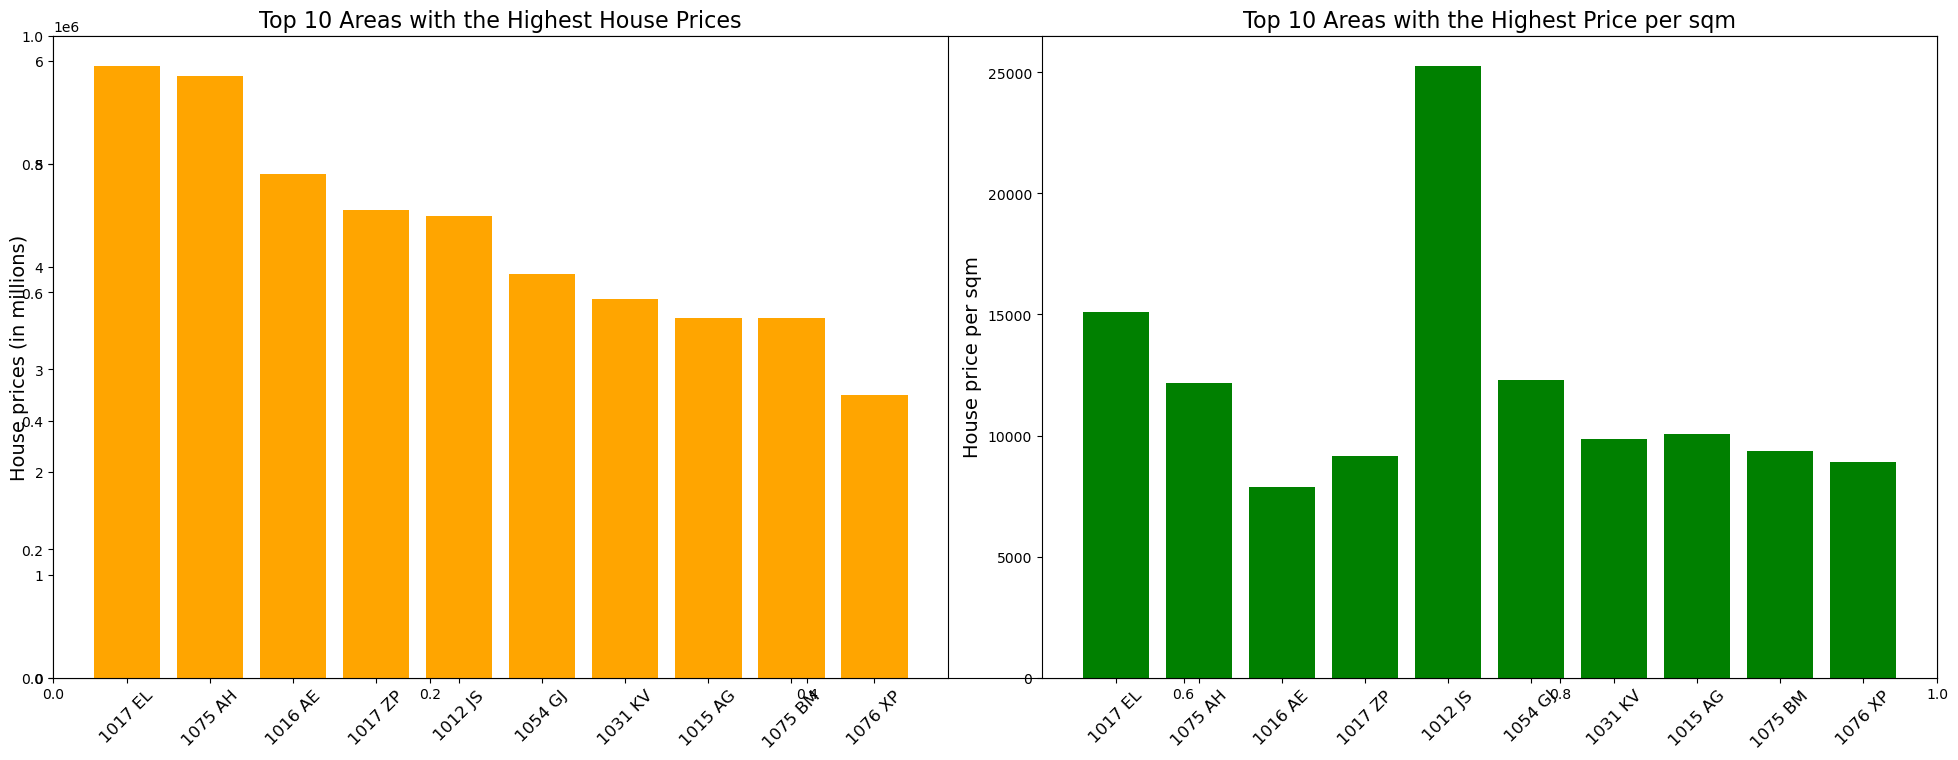

In [4]:
# --- Case 3: Advanced 2 ---
fig, ax = plt.subplots(figsize=(20, 8))

x = houseprices_sorted['Zip'].head(10)
y = houseprices_sorted['Price'].head(10)
y1 = houseprices_sorted['PriceperSqm'].head(10)

plt.subplot(1, 2, 1)
plt.bar(x, y, color='orange')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('House prices (in millions)', fontsize=14)
plt.title('Top 10 Areas with the Highest House Prices', fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='green')
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('House price per sqm', fontsize=14)
plt.title('Top 10 Areas with the Highest Price per sqm', fontsize=16)

plt.tight_layout()
plt.show()

##### Dùng subplot để hiển thị 2 biểu đồ cạnh nhau:
##### Trái: Top 10 khu vực có giá nhà cao nhất.
##### Phải: Top 10 khu vực có giá trung bình/m² cao nhất.
##### So sánh trực quan giữa giá tuyệt đối và giá theo diện tích.
##### → Giúp thấy khu vực nào thực sự “đắt đỏ” theo giá/m².

## 3. Trưc quan hóa dữ liệu với thư viện Seaborn

### Case 1: basic


C:\Users\HP\AppData\Local\Temp\ipykernel_13728\626881262.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Zip', y='Price', palette='Blues_d')


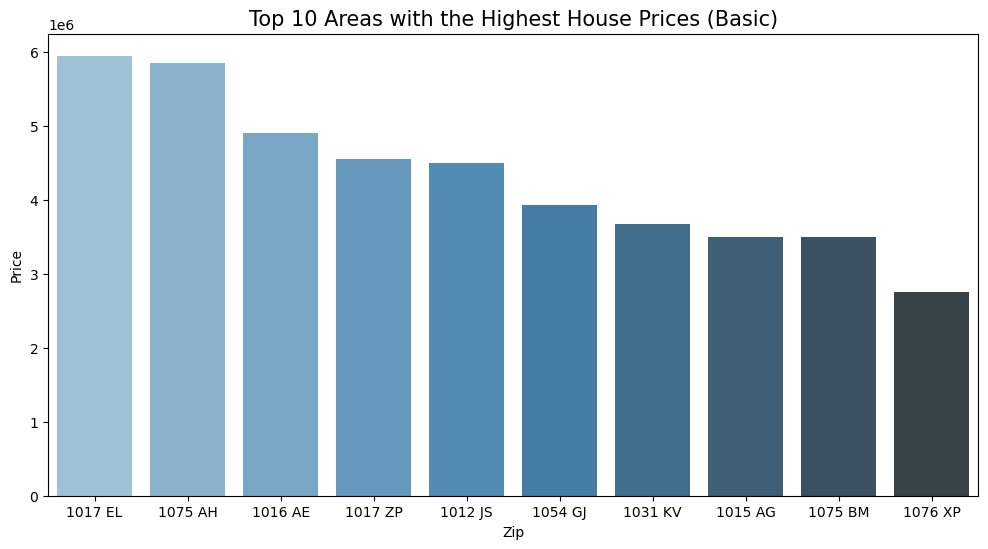

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Chuẩn bị dữ liệu ---
data = houseprices_sorted.head(10)

# --- Case 1: Basic ---
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Zip', y='Price', palette='Blues_d')
plt.title('Top 10 Areas with the Highest House Prices (Basic)', fontsize=15)
plt.show()

##### Hiển thị Top 10 mã vùng (Zip) có giá nhà trung bình cao nhất.
##### Đây là cách nhanh nhất để có cái nhìn tổng quan về phân bố giá nhà theo khu vực.
##### Dạng biểu đồ cột đơn giản hiển thị giá nhà trung bình theo mã vùng.
##### palette='Blues_d' giúp bảng màu đẹp và đồng nhất.
##### → Phù hợp để có cái nhìn tổng quan nhanh

### Case 2: advanced 1

C:\Users\HP\AppData\Local\Temp\ipykernel_13728\246954130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x='Zip', y='Price', palette='coolwarm')


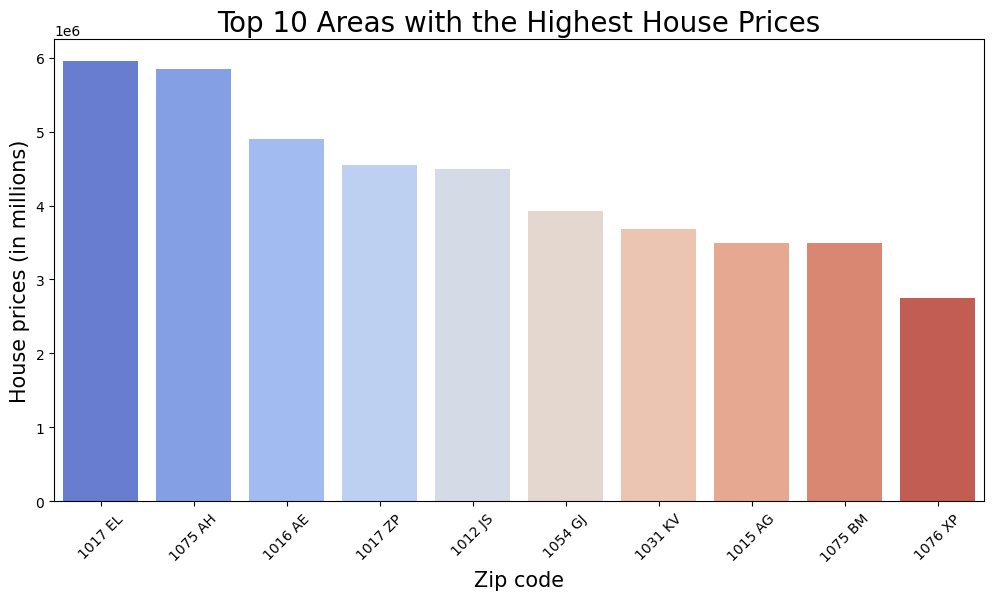

In [6]:
# --- Case 2: Advanced 1 ---
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data, x='Zip', y='Price', palette='coolwarm')
ax.set_xlabel('Zip code', fontsize=15)
ax.set_ylabel('House prices (in millions)', fontsize=15)
ax.set_title('Top 10 Areas with the Highest House Prices', fontsize=20)
ax.tick_params(axis='x', rotation=45)
plt.show()

##### Cải thiện tính trực quan và thẩm mỹ để dễ đọc, dễ hiểu khi trình bày trong báo cáo.
##### Có tiêu đề, nhãn trục, phông chữ lớn hơn và xoay nhãn trục X giúp dễ đọc.
##### palette='coolwarm' cho hiệu ứng màu nổi bật.
##### → Phù hợp khi muốn trình bày trong báo cáo hoặc slide.

### Case 3: Advanced 2

C:\Users\HP\AppData\Local\Temp\ipykernel_13728\2517813405.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Zip', y='Price', ax=ax[0], palette='rocket')
C:\Users\HP\AppData\Local\Temp\ipykernel_13728\2517813405.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Zip', y='PriceperSqm', ax=ax[1], palette='crest')


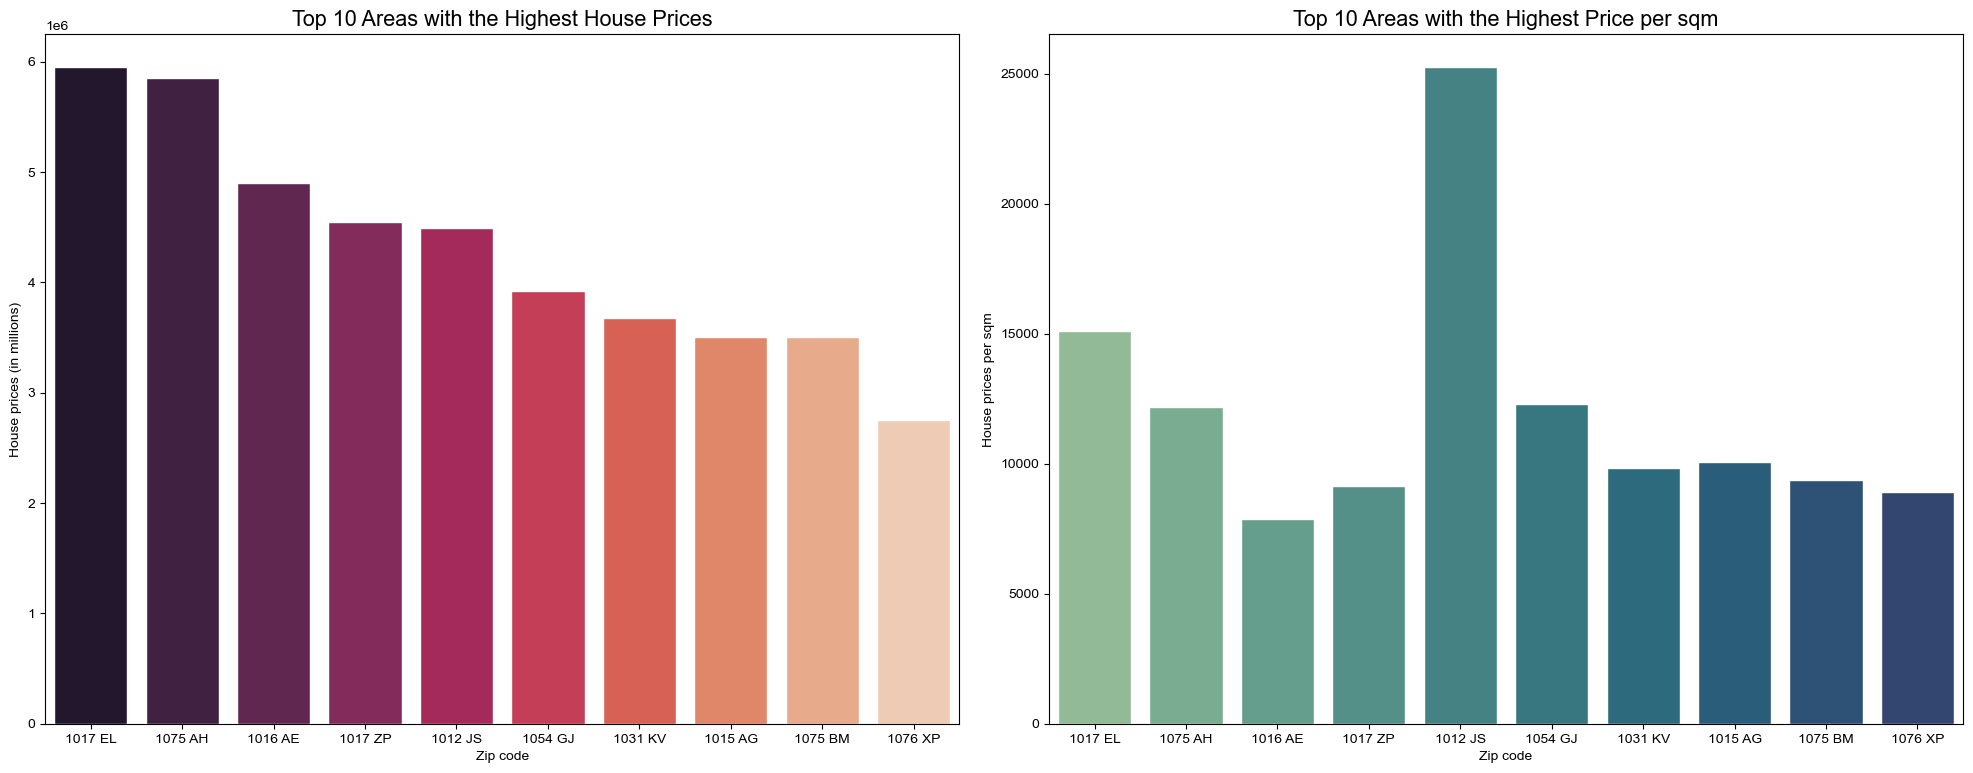

In [7]:
# --- Case 3: View multiple perspectives ---
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.set(style="whitegrid", font_scale=1.3)

# Biểu đồ 1 - Giá nhà
sns.barplot(data=data, x='Zip', y='Price', ax=ax[0], palette='rocket')
ax[0].set_xlabel('Zip code')
ax[0].set_ylabel('House prices (in millions)')
ax[0].set_title('Top 10 Areas with the Highest House Prices')

# Biểu đồ 2 - Giá/m²
sns.barplot(data=data, x='Zip', y='PriceperSqm', ax=ax[1], palette='crest')
ax[1].set_xlabel('Zip code')
ax[1].set_ylabel('House prices per sqm')
ax[1].set_title('Top 10 Areas with the Highest Price per sqm')

plt.tight_layout()
plt.show()

##### Hiển thị hai góc nhìn song song:
##### Trái: Giá nhà trung bình (Price).
##### Phải: Giá/m² (PriceperSqm).
##### Dễ dàng so sánh khu vực “đắt đỏ thật sự” (tức giá/m² cao chứ không chỉ tổng giá cao).
##### Có thể thấy rằng một số khu giá tổng cao chưa chắc giá/m² cao (do nhà rộng hơn).
##### Ngược lại, có khu nhà nhỏ nhưng giá/m² rất cao — thường là trung tâm hoặc khu phố cổ.
##### Nếu Zip = 1017 (khu trung tâm cũ) có PriceperSqm rất cao → điều này đúng với thị trường thực tế Amsterdam.